# 주성분 분석

Q. 데이터 표준화 이후, 주성분 분석을 실시하여 2차원(1 vs 2 주성분, 1 vs 3 주성분, …)

산점도를 그려라.(목표변수로 색 구분), + 주성분 naming

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

#### 데이터 구성하기

In [ ]:
import os
os.chdir("/home/piai/문서/2. Big Data 분석")
os.getcwd()
df_raw = pd.read_csv("./유방암.csv", encoding = 'euc=kr')
df_raw.head()

In [3]:
def diag(x):
    if x == "음성":
        return 0
    else:
        return 1

In [4]:
# diagnosis열이 '음성', '양성' 을 정수에 대입시켜 변환시켜준다
df_raw['diagnosis'] = df_raw['diagnosis'].apply(diag)
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0          0        15.12         16.68           98.78      716.6   
1          1        10.80          9.71           68.77      357.6   
2          0        18.31         18.58          118.60     1041.0   
3          1        14.92         14.93           96.45      686.9   
4          1        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [5]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    int64  
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [8]:
# 데이터 분리(Y, Xs) - > 설명변수를 이용한 주성분 분석
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis",axis = 1, inplace = False)

# 주성분 회귀분석의 목표변수
df_raw_y.head()

0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

In [6]:
# 주성분 분석 입력변수
df_raw_x.head()

In [11]:
df_raw_x.shape

(320, 30)

#### 선형관계확인 : 산점도 및 상관계수

In [1]:
# # 산점도 행렬
# sns.pairplot(df_raw_x)
# plt.show(sns)

In [2]:
# # Pearson 상관계수
# df_raw_x.corr().round(3)

#### 데이터 확인 및 scaling

In [3]:
# # 요약통계량 -> scale 변환 필요 확인
# df_raw_x.describe().round(3)

모든 열의 mean값을 비교해보았을 때 mean_area같은 경우는 807로 매우 크지만 mean_compactness의 경우 0.123으로 작다.

주성분 분석을 할 때 원래 변수의 scale(척도)가 유사해야 하기 때문에 각 변수를 standardscaler를 이요하여 동일한 척도로 변환하기로 한다.

In [7]:
# 변수 이름 저장
x_cols = df_raw_x.columns

scaler = StandardScaler()
nd_scaled = StandardScaler().fit_transform(df_raw_x)

#변환된 데이터 형태 및 형태 확인
print("Scaled Data : \n{}".format(nd_scaled[:5].round(3)))
print("Shape:\n{}".format(nd_scaled.shape))

In [8]:
# DataFrame으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

In [4]:
# # Scaled 변환 데이터 요약 통계량
# df_scaled.describe().round(3)

Scaled 변환된 데이터의 요약 통계량을 보면 모든 열의 mean이 0으로 변화된 것을 확인할 수 있다.

#### 주성분 분석

In [11]:
# 주성분 분석 : 주성분1 ~ 주성분30
pca = PCA(n_components=30)
nd_pca = pca.fit_transform(df_scaled)

# 생성된 주성분 점수 확인
print("PCA data : \n {}".format(nd_pca[:29]))

# 생성된 주성분 점수 Row, Column 개수 확인
print("Shape :\n{}".format(nd_pca.shape))

PCA data : 
 [[-2.00389702e+00 -2.58058106e-01 -1.84890296e+00 -1.31467512e+00
   6.24726217e-01  7.89451676e-01  1.32108678e-01 -1.01407999e+00
   4.97472568e-01 -5.11154359e-01 -1.59476526e-01 -3.85870988e-04
  -1.78211309e-02 -6.72126362e-02  1.47199795e-01 -7.13592324e-02
  -1.35801647e-01  1.60993793e-01 -4.78160362e-01 -2.37147886e-01
   2.44216713e-01  1.64854061e-01  6.63767950e-02  1.80669748e-01
  -1.14558313e-03  8.63622562e-03 -6.86072623e-02  6.04830294e-04
   2.58020639e-02  1.41585915e-02]
 [-5.84906746e+00  2.11647637e-01 -1.68087360e-01 -2.95641861e+00
   1.83054388e+00 -4.05165090e-01  3.23010727e-01 -5.26610206e-01
   4.11091221e-01  1.33667857e-01 -6.39117982e-01 -1.75471721e-01
  -2.09690997e-01 -9.71313041e-02 -2.06895790e-01  1.35980861e-01
  -1.49034285e-01  9.55093848e-02 -1.27211295e-01 -1.48419478e-01
   1.08089523e-01  1.68014456e-01 -6.48893521e-02 -4.34769760e-02
   1.49143900e-02 -4.33905539e-02 -4.97770561e-02  1.20852801e-02
   1.49415519e-02  3.8018117

#### 주성분 분석 및 결과 : 주성분 점수

In [15]:
# 주성분 점수 저장 및 확인
df_pca = pd.DataFrame(nd_pca, columns = ["Prin" + str(i) for i in range(1,31)])

# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0    -0.157678     -0.879112       -0.165550  -0.232872        -0.744948   
1    -1.312779     -2.560965       -1.328928  -1.150194        -0.240274   
2     0.695279     -0.420644        0.602798   0.596040        -0.947380   
3    -0.211154     -1.301385       -0.255876  -0.308762        -1.291796   
4    -0.753945     -1.738136       -0.820314  -0.745704        -2.095198   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0         -0.479220       -0.550769            -0.628488      -0.997431   
1         -1.153621       -1.143404            -1.199934      -1.773612   
2         -0.675307       -0.477679            -0.212084      -0.899042   
3         -0.661126       -0.788224            -0.834410      -0.658535   
4         -1.505004       -1.175403            -1.326415      -1.933950   

   mean_fractal_dimension  ...    Prin21    Prin22    Prin23    Prin24  \
0               -0.392627  ...  0.244217  0.164854  0.066377  0.180670   
1                0.184077  ...  0.108090  0.168014 -0.064889 -0.043477   
2               -1.174101  ... -0.034971 -0.296615 -0.089094 -0.111252   
3               -0.834209  ... -0.009942 -0.103717  0.066354  0.105339   
4               -0.956793  ...  0.072100  0.129423 -0.003367  0.020147   

     Prin25    Prin26    Prin27    Prin28    Prin29    Prin30  
0 -0.001146  0.008636 -0.068607  0.000605  0.025802  0.014159  
1  0.014914 -0.043391 -0.049777  0.012085  0.014942  0.003802  
2 -0.078950 -0.050892  0.067030  0.030987  0.012601 -0.003082  
3 -0.013316 -0.011097 -0.021080  0.033756 -0.021498  0.005064  
4 -0.045760  0.052844 -0.065091  0.017130  0.021292 -0.001706  

[5 rows x 60 columns]

#### 주성분 분석 및 결과 : 고유값(Eigenvalue) 확인 및 주성분 개수 결정

In [16]:
# 주성분 분석 통계량 저장 : 주성분 번호, Eigenvalue, Eigenvalue ratio
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [i for i in range(1, 31)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

PrinNo  EigenValues  EigenValueRatio  CumEigenValueRatio
0        1       13.125            0.436               0.436
1        2        5.982            0.199               0.635
2        3        3.116            0.104               0.738
3        4        1.950            0.065               0.803
4        5        1.319            0.044               0.847
5        6        1.252            0.042               0.889
6        7        0.749            0.025               0.914
7        8        0.534            0.018               0.931
8        9        0.376            0.012               0.944
9       10        0.321            0.011               0.954
10      11        0.290            0.010               0.964
11      12        0.266            0.009               0.973
12      13        0.173            0.006               0.979
13      14        0.148            0.005               0.984
14      15        0.107            0.004               0.987
15      16        0.070            0.002               0.989
16      17        0.064            0.002               0.992
17      18        0.054            0.002               0.993
18      19        0.048            0.002               0.995
19      20        0.033            0.001               0.996
20      21        0.031            0.001               0.997
21      22        0.023            0.001               0.998
22      23        0.021            0.001               0.999
23      24        0.014            0.000               0.999
24      25        0.011            0.000               0.999
25      26        0.009            0.000               1.000
26      27        0.006            0.000               1.000
27      28        0.002            0.000               1.000
28      29        0.001            0.000               1.000
29      30        0.000            0.000               1.000

<주성분 기여율 이용>

주성분이 4개가 되는 순간 고유값 누적 비율이 80%가 넘어간다.

=> 주성분은 4개 사용하기로 결정한다

/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes

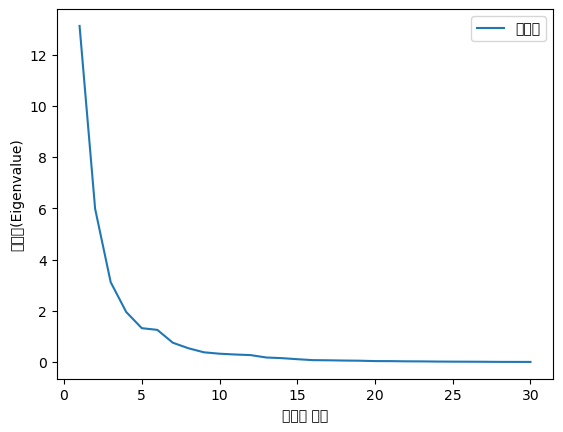

In [17]:
# Scree Plot
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label = "고유값")

#  그래프 label, legend 설정
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc = 'best')
plt.show()

 scree plot을 확인했을 때 4~6 사이의 구간에서 고유값이 급격히 감소하는 것을 확인할 수 있다. 
 
 따라서 최종적으로 주성분은 4개를 선택하기로 결정한다

/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


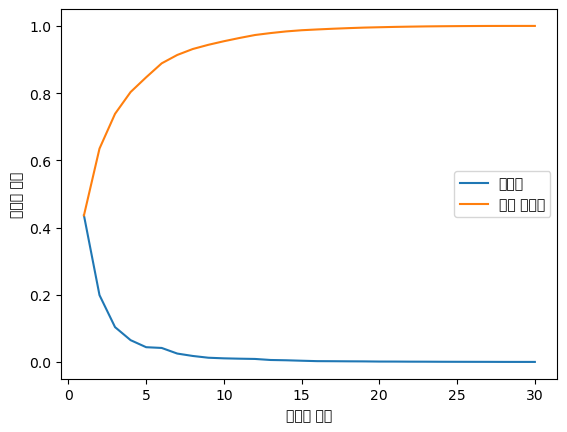

In [18]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label = '고유값')

# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label="누적 고유값")
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')
plt.show()

#### 주성분 분석 및 결과 : 고유벡터(Eigenvector) 확인 및 해석

In [22]:
# 주성분 분석 데이터의 변수 이름
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

# 주성분 Prin 1~30까지의 고유벡터 저장
# 전치 결과 pd.DataFrame(pca.components_, columns = [Prin1,,,,,], axis = 1)
# 파이썬 PCA 분석 시 SVD 연산 방식의 차이 반영(전치, 부호 변경)
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1,\
                                                columns = ["Prin" + str(i) for i in range(1,31)])], axis = 1)
df_eigenvector.round(3)

Feature  Prin1  Prin2  Prin3  Prin4  Prin5  Prin6  Prin7  \
0               mean_radius -0.214  0.238  0.026  0.026 -0.007 -0.068  0.156   
1              mean_texture -0.110  0.046  0.038 -0.604  0.042  0.101 -0.030   
2            mean_perimeter -0.225  0.218  0.024  0.029 -0.010 -0.068  0.147   
3                 mean_area -0.213  0.245 -0.002  0.040 -0.010 -0.035  0.082   
4           mean_smoothness -0.151 -0.194  0.058  0.201 -0.037  0.474  0.074   
5          mean_compactness -0.240 -0.163  0.046  0.053 -0.024 -0.040 -0.025   
6            mean_concavity -0.261 -0.046  0.003  0.046 -0.060 -0.019  0.107   
7       mean_concave_points -0.260  0.039  0.035  0.086 -0.008  0.067  0.154   
8             mean_symmetry -0.147 -0.197  0.047  0.138  0.428  0.061  0.054   
9    mean_fractal_dimension -0.076 -0.351 -0.000  0.080 -0.056  0.104 -0.290   
10             radius_error -0.202  0.158 -0.205  0.088  0.080  0.152 -0.362   
11            texture_error -0.050 -0.062 -0.346 -0.359  0.182  0.208  0.037   
12          perimeter_error -0.208  0.132 -0.226  0.075  0.079  0.091 -0.359   
13               area_error -0.195  0.187 -0.168  0.100  0.054  0.133 -0.386   
14         smoothness_error -0.033 -0.125 -0.373  0.014 -0.189  0.341  0.325   
15        compactness_error -0.179 -0.209 -0.194 -0.083 -0.104 -0.281 -0.018   
16          concavity_error -0.185 -0.154 -0.238 -0.054 -0.166 -0.252  0.159   
17     concave_points_error -0.186 -0.074 -0.272  0.006 -0.119 -0.077  0.253   
18           symmetry_error -0.064 -0.147 -0.285  0.057  0.550 -0.119  0.127   
19  fractal_dimension_error -0.127 -0.246 -0.237 -0.049 -0.181 -0.192 -0.179   
20             worst_radius -0.221  0.225  0.090  0.008  0.003 -0.013  0.027   
21            worst_texture -0.106  0.011  0.148 -0.609  0.087  0.156 -0.028   
22          worst_perimeter -0.233  0.202  0.083  0.008 -0.000 -0.034  0.020   
23               worst_area -0.215  0.234  0.064  0.020 -0.005  0.019 -0.054   
24         worst_smoothness -0.128 -0.193  0.229  0.054 -0.123  0.481  0.105   
25        worst_compactness -0.199 -0.190  0.209 -0.066 -0.063 -0.172 -0.108   
26          worst_concavity -0.225 -0.120  0.180 -0.050 -0.118 -0.153  0.059   
27     worst_concave_points -0.247 -0.010  0.180  0.034 -0.050 -0.010  0.164   
28           worst_symmetry -0.111 -0.184  0.239  0.041  0.524 -0.099  0.084   
29  worst_fractal_dimension -0.124 -0.289  0.208 -0.046 -0.126 -0.068 -0.315   

    Prin8  Prin9  ...  Prin21  Prin22  Prin23  Prin24  Prin25  Prin26  Prin27  \
0  -0.097 -0.196  ...   0.166   0.074  -0.078   0.131   0.070  -0.082   0.168   
1   0.138  0.097  ...  -0.251   0.109  -0.136  -0.183  -0.070  -0.017   0.040   
2  -0.106 -0.182  ...   0.113   0.072  -0.027   0.048   0.095  -0.072   0.168   
3  -0.048 -0.229  ...  -0.032  -0.035   0.137   0.060  -0.114   0.142  -0.543   
4  -0.196 -0.012  ...   0.076   0.107   0.058  -0.064   0.008  -0.057  -0.069   
5  -0.136  0.011  ...  -0.184   0.053  -0.350  -0.201   0.202   0.266  -0.169   
6  -0.057  0.024  ...  -0.259  -0.314   0.112   0.046   0.039  -0.637  -0.129   
7  -0.191 -0.009  ...   0.092  -0.325   0.099   0.065  -0.168   0.527   0.291   
8  -0.219  0.176  ...   0.100  -0.003   0.064   0.021  -0.024  -0.026   0.008   
9  -0.176 -0.104  ...   0.116   0.181   0.092   0.247  -0.011  -0.079   0.125   
10  0.143  0.162  ...   0.233  -0.062  -0.433   0.426   0.005  -0.028  -0.235   
11 -0.493 -0.107  ...  -0.112   0.059  -0.136  -0.116  -0.044  -0.004   0.020   
12  0.091  0.239  ...   0.152   0.111   0.531  -0.321  -0.063   0.067  -0.131   
13  0.195  0.061  ...  -0.311   0.033  -0.125  -0.075   0.094  -0.005   0.409   
14  0.453 -0.252  ...   0.068   0.091   0.060  -0.012   0.052   0.003  -0.001   
15  0.071 -0.090  ...   0.119  -0.132   0.082   0.015   0.404  -0.063  -0.016   
16  0.163  0.141  ...   0.271  -0.050  -0.231  -0.240  -0.374   0.090   0.031   
17 -0.106  0.534  ...  -0.214  -0.226   0.079   0.164   0.074  -0.012   0.048   


#### 주성분 상관/회귀분석 : 상관관계

In [9]:
# # 산점도 행렬
# sns.pairplot(df_pca)
# plt.show(sns)

In [10]:
# # 상관계수
# df_pca.corr().round(3)

주성분은 서로 독립적이다. 상관계수는 = 0 이다.

#### 주성분 상관/회귀분석 : 회귀분석

In [11]:
# 다중선형 회귀분석 : 원천 데이터 활용
# 원천 데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)

#회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)

#회귀모델 적합
reg_model = reg_model.fit()

#모델 성능 확인
print(reg_model.summary())

In [12]:
# 다중선형 주성분 회귀분석 : 주성분 점수(score) 데이터 활용
# Eigenvalue ,Scree plot 기준으로 적정 주성분 선택
x_var = ['Prin1', 'Prin2','Prin3', 'Prin4']

# 선택된 주성분 점수 데이터에 절편(const) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

#회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_pca_const)

#회귀모델 적합
reg_model = reg_model.fit()

#모델 성능 확인
print(reg_model.summary())

1. 전체 설명변수를 이용한 모델의 설명력은  Adj. R-squared: 0.723이었으나 4개의 주성분을 이용한 회귀모델의 설명력은  Adj. R-squared: 0.618로 설명력이 72%에서 61%로 11% 저하되었다.

- 기여율이 약한 주성분 5~30을 제외하여 설명력이 저하되었다.

2. 주성분 회귀분석의 회귀계수는 모두 유의하다.

# 2차원 산점도

In [32]:
# 주성분 분석 : 주성분1, 주성분2, 주성분3, 주성분 4
pca_12 = PCA(n_components=4)
pca_12.fit(df_scaled)
x_pca_12 = pca_12.transform(df_scaled)
print("원본 데이터 형태:", str(df_scaled.shape))
print("축소된 데이터 형태:", str(x_pca_12.shape))

원본 데이터 형태: (320, 30)
축소된 데이터 형태: (320, 4)


## 주성분 1, 주성분 2

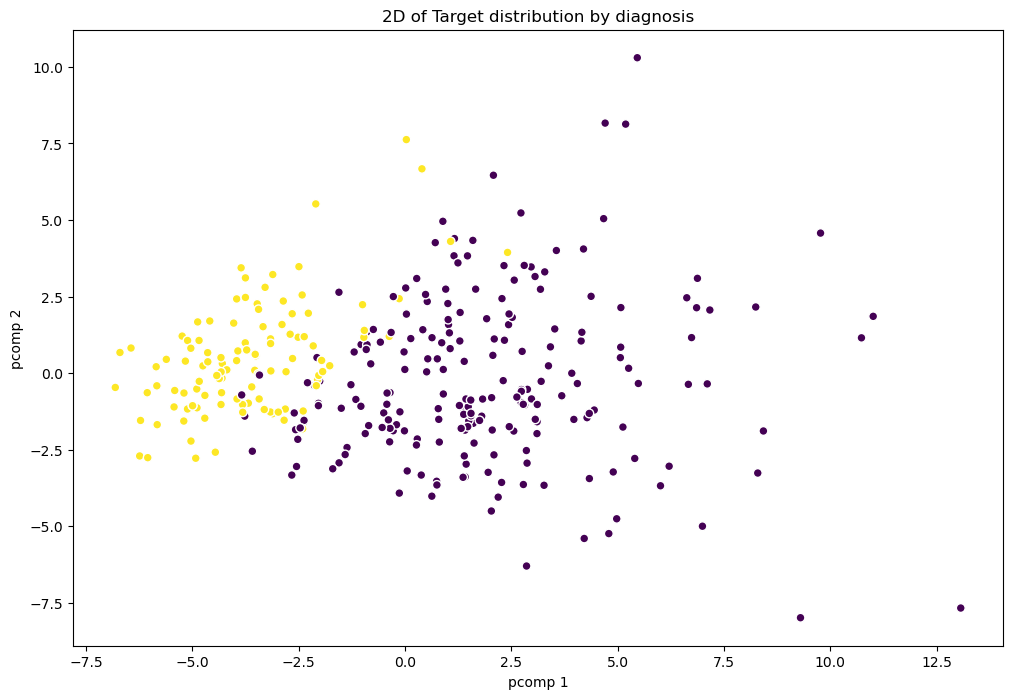

In [33]:
plt.figure(figsize=(12, 8))
plt.scatter(x_pca_12[:,0], x_pca_12[:,1], c=df_raw_y, s=40, edgecolors='white')
plt.title("2D of Target distribution by diagnosis")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()